In [66]:
# to read the csv file
import pandas as pd
import csv

# utils
import numpy as np

# to do graphs
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split

#sklearn models
from sklearn import linear_model

#sklearn scores
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score

## 1. Data exploration and preprocessing

The goal of the project is to predic the credit issue of a client (Y), according to some variables, as shown below.
A credit default contains the following variables:

<table>
<tr>
    <th>Variable</th>
    <th>Content</th>
    <th>Type</th>
</tr>
<tr class="odd">
    <td align="left">BirthDate</td>
    <td align="left">Client birth date</td>
    <td align="left">Date</td>
</tr>
<tr class="even">
    <td align="left">Customer_Open_Date</td>
    <td align="left">Arrival date of the client in the branch of the bank filial</td>
    <td align="left">Date</td>
</tr>
<tr class="odd">
<td align="left">Customer_Type</td>
<td align="left">Customer type (existing / new)</td>
<td align="left">String</td>
</tr>
<tr class="even">
<td align="left">Educational_Level</td>
<td align="left">Highest Degree</td>
<td align="left">String</td>
</tr>
<tr class="odd">
<td align="left">Id_Customer</td>
<td align="left">Customer identifier</td>
<td align="left">Numerical</td>
</tr>
<tr class="even">
<td align="left">Marital_Status</td>
<td align="left">Martital status</td>
<td align="left">String</td>
</tr>
<tr class="odd">
<td align="left">Nb_Of_Products</td>
<td align="left">Number of products detained by the customer at the decision date</td>
<td align="left">Numerical</td>
</tr>
<tr class="even">
<td align="left">Net_Annual_Income</td>
<td align="left">Annual income</td>
<td align="left">Numerical</td>
</tr>
<tr class="odd">
<td align="left">Number_Of_Dependant</td>
<td align="left">Number of dependant</td>
<td align="left">Numerical</td>
</tr>
<tr class="even">
<td align="left">P_Client</td>
<td align="left">Intern categorization of the client</td>
<td align="left">String</td>
</tr>
<tr class="odd">
<td align="left">Prod_Category</td>
<td align="left">Product category</td>
<td align="left">String</td>
</tr>
<tr class="even">
<td align="left">Prod_Closed_Date</td>
<td align="left">Closing date of the product</td>
<td align="left">Date</td>
</tr>
<tr class="odd">
<td align="left">Prod_Decision_Date</td>
<td align="left">Decision date of the financing grant</td>
<td align="left">Date</td>
</tr>
<tr class="even">
<td align="left">Prod_Sub_Category</td>
<td align="left">Product subcategory</td>
<td align="left">String</td>
</tr>
<tr class="odd">
<td align="left">Source</td>
<td align="left">Financing source (Branch / Sales)</td>
<td align="left">String</td>
</tr>
<tr class="even">
<td align="left">Type_Of_Residence</td>
<td align="left">Type of residence</td>
<td align="left">String</td>
</tr>
<tr class="odd">
<td align="left">Years_At_Business</td>
<td align="left">Number of years in the current job</td>
<td align="left">Numerical</td>
</tr>
<tr class="even">
<td align="left">Years_At_Residence</td>
<td align="left">Number of years at the current residence place</td>
<td align="left">Numerical</td>
</tr>
<tr class="odd">
<td align="left">Y</td>
<td align="left">Credit issue (to be predicted)</td>
<td align="left">Numerical</td>
</tr>
</table>

In [7]:
df = pd.read_csv("CreditTraining.csv")
keys = df.keys()
df.head()

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,NaN,B
1,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,NaN,G
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,NaN,B
3,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,31/12/2012,L
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,NP_Client,University,Married,2.0,1,36,1.0,C,11/01/2012,Sales,Owned,1,NaN,D


The variables can already be categorised:
- dates
- string categories (binary or not)
- integers categories (binary or not)
- numbers, "Net_Annual_Income" for instance

### a. The Customer Id
The id play does not provide any information, since there is no duplicate in the list of ids (meaning that the same customer does not appear twice in the list).

In [8]:
len(df[keys[0]]) == len(list(dict.fromkeys(df[keys[0]])))

True

In [9]:
df = df.drop(columns=['Id_Customer'])
keys = df.keys()

### b. Dates
The string data needs to be put under a good format.

In [11]:
date_variables = ['BirthDate', 'Customer_Open_Date', 'Prod_Decision_Date', 'Prod_Closed_Date']
for var in date_variables:
    df[var] = pd.to_datetime(df[var])
df.head()

,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,0,Non Existing Client,1977-07-08,2012-02-13,NP_Client,University,Married,3.0,1,36,1.0,C,2012-02-14,Sales,Owned,1,NaT,B
1,0,Existing Client,1974-06-13,2009-04-02,P_Client,University,Married,0.0,12,18,2.0,C,2011-06-30,Sales,Parents,1,NaT,G
2,0,Non Existing Client,1973-07-11,2012-03-04,NP_Client,University,Married,2.0,10,36,1.0,C,2012-04-04,Sales,Owned,1,NaT,B
3,1,Existing Client,1982-08-07,2011-08-25,NP_Client,University,Married,3.0,3,36,1.0,C,2011-07-09,Sales,New rent,1,2012-12-31,L
4,0,Non Existing Client,1953-08-18,2012-10-01,NP_Client,University,Married,2.0,1,36,1.0,C,2012-11-01,Sales,Owned,1,NaT,D


### c. Categorical variables

In [37]:
categorical_variables = [ 'Y', 'Customer_Type', 'P_Client', 'Educational_Level', 
                         'Marital_Status', 'Prod_Sub_Category', 'Source', 'Type_Of_Residence', 'Prod_Category']
for var in categorical_variables:
    df[var]= df[var].astype('category')

### d. Numeric variables

In [13]:
df['Net_Annual_Income'] = df['Net_Annual_Income'].astype('str').apply(lambda x: str(x.replace(',','.')))
df['Net_Annual_Income'] = df['Net_Annual_Income'].astype('float')

In [38]:
numerical_variables = ['Number_Of_Dependant', 'Years_At_Residence', 'Net_Annual_Income',
                     'Years_At_Business', 'Nb_Of_Products' ]

### e. Brief overview of the variables

First, let see the type and a summary of each column

In [15]:
print("{0:30} {1:30} {2}".format("Column", "Type", "Number of members"))
print("------------------------------------------------------------------------------------")
for column in keys:
    print("{0:30} {1:30} {2}".format(column, str(df[column].dtypes) , str(len(list(dict.fromkeys(df[column].values))))))

Column                         Type                           Number of members
------------------------------------------------------------------------------------
Y                              category                       2
Customer_Type                  category                       2
BirthDate                      datetime64[ns]                 4382
Customer_Open_Date             datetime64[ns]                 1244
P_Client                       category                       2
Educational_Level              category                       4
Marital_Status                 category                       5
Number_Of_Dependant            float64                        12
Years_At_Residence             int64                          60
Net_Annual_Income              float64                        524
Years_At_Business              float64                        46
Prod_Sub_Category              category                       3
Prod_Decision_Date             datetime64[ns]           

In [16]:
df.describe(include = 'category')

,Y,Customer_Type,P_Client,Educational_Level,Marital_Status,Prod_Sub_Category,Source,Type_Of_Residence,Prod_Category
count,5380,5380,5380,5380,5380,5380,5380,5380,5380
unique,2,2,2,4,5,3,2,5,13
top,0,Non Existing Client,NP_Client,University,Married,C,Sales,Owned,B
freq,4987,3369,4968,4785,4206,4638,4119,4791,3176


In [17]:
df.describe(include = 'datetime64[ns]')

,BirthDate,Customer_Open_Date,Prod_Decision_Date,Prod_Closed_Date
count,5380,5380,5380,1174
unique,4382,1244,276,331
top,1982-01-01 00:00:00,2011-05-12 00:00:00,2011-06-12 00:00:00,2013-05-30 00:00:00
freq,7,39,48,98
first,1937-06-12 00:00:00,1982-04-03 00:00:00,2011-01-06 00:00:00,2011-10-31 00:00:00
last,1990-11-01 00:00:00,2012-12-04 00:00:00,2012-12-04 00:00:00,2013-12-05 00:00:00


In [18]:
df.describe()

,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Nb_Of_Products
count,5378.000000,5380.000000,5378.000000,5378.000000,5380.000000
mean,1.058572,12.626022,61.181694,4.266270,1.089033
std,1.339001,9.972164,237.744827,7.225926,0.297587
min,0.000000,0.000000,0.004000,0.000000,1.000000
25%,0.000000,4.000000,20.000000,1.000000,1.000000
50%,0.000000,10.000000,36.000000,1.000000,1.000000
75%,2.000000,18.000000,36.000000,4.000000,1.000000
max,20.000000,70.000000,10000.000000,98.000000,3.000000


Now, visualize the variables one by one:

0    4987
1     393
Name: Y, dtype: int64
-------
Non Existing Client    3369
Existing Client        2011
Name: Customer_Type, dtype: int64
-------
NP_Client    4968
P_Client      412
Name: P_Client, dtype: int64
-------
University           4785
Master/PhD            522
Diploma                58
Secondary or Less      15
Name: Educational_Level, dtype: int64
-------
Married      4206
Single       1046
Widowed        64
Divorced       63
Separated       1
Name: Marital_Status, dtype: int64
-------
C    4638
G     624
P     118
Name: Prod_Sub_Category, dtype: int64
-------
Sales     4119
Branch    1261
Name: Source, dtype: int64
-------
Owned       4791
Old rent     323
Parents      179
New rent      83
Company        4
Name: Type_Of_Residence, dtype: int64
-------
B    3176
D     670
C     517
K     265
L     236
G     188
E     101
H      79
J      71
M      49
A      19
F       5
I       4
Name: Prod_Category, dtype: int64
-------


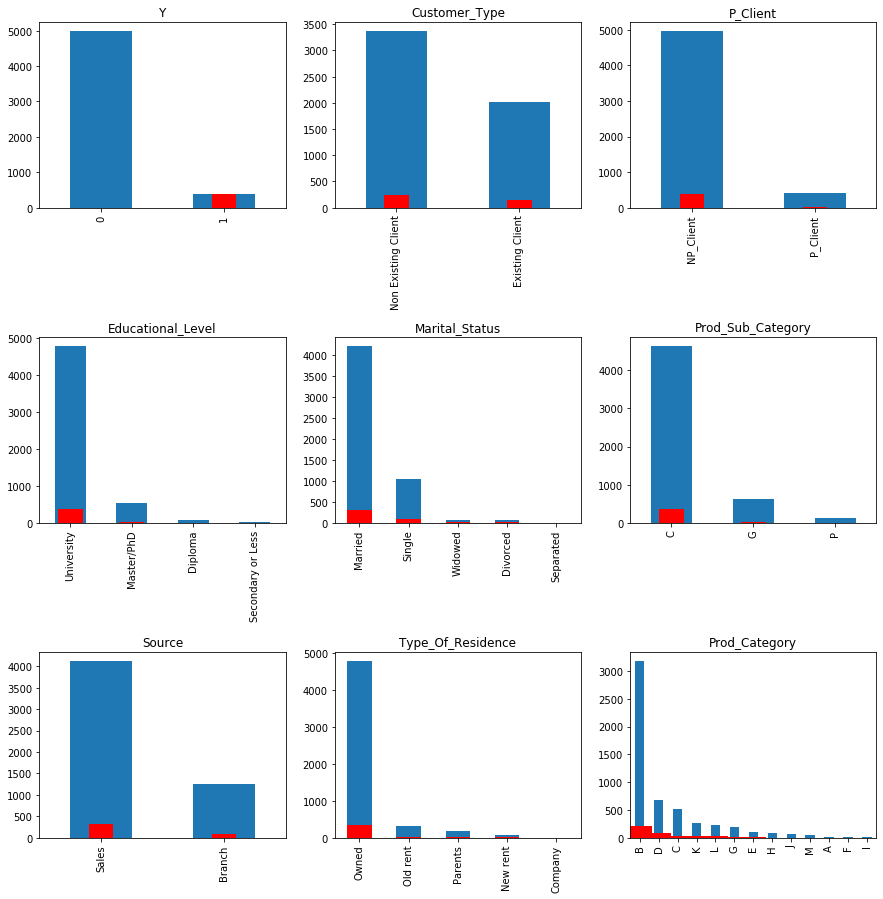

In [25]:
plt.figure(figsize=(15,15))

for i,var in enumerate(categorical_variables):
    plt.subplot(3,3,i+1)
    print(df[var].value_counts())
    print('-------')
    df[var].value_counts().plot("bar").set_title(var)
    hist_data = df.loc[df['Y'] == 1][var].value_counts()
    plt.bar(height=hist_data.values, x = hist_data.keys(), width = len(hist_data)/10, color='red')

plt.subplots_adjust(hspace = 0.7)
plt.show()

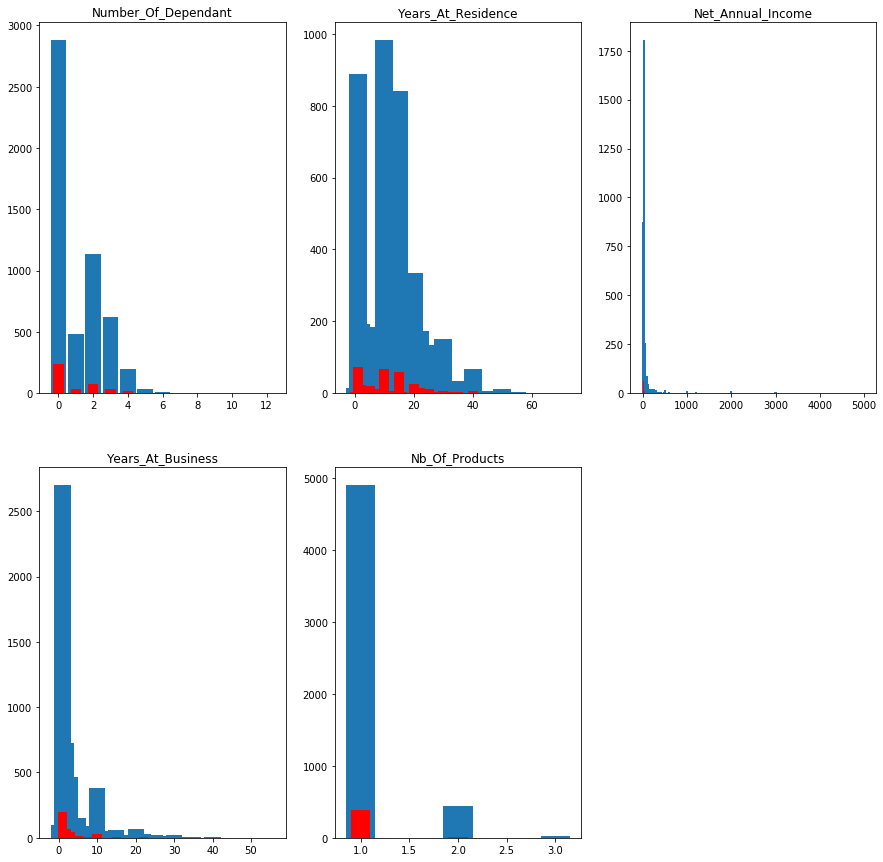

In [39]:
plt.subplots(figsize=(15,15))

for i, var in enumerate(numerical_variables):
    fig = plt.subplot(2,3,i+1)
    fig.set_title(var)
    hist_data = df[var].value_counts()
    plt.bar(height=hist_data.values, x = hist_data.keys(), width = len(hist_data)/10)
    hist_data = df.loc[df['Y'] == 1][var].value_counts()
    plt.bar(height=hist_data.values, x = hist_data.keys(), width = len(hist_data)/10, color='red')
    
plt.show()

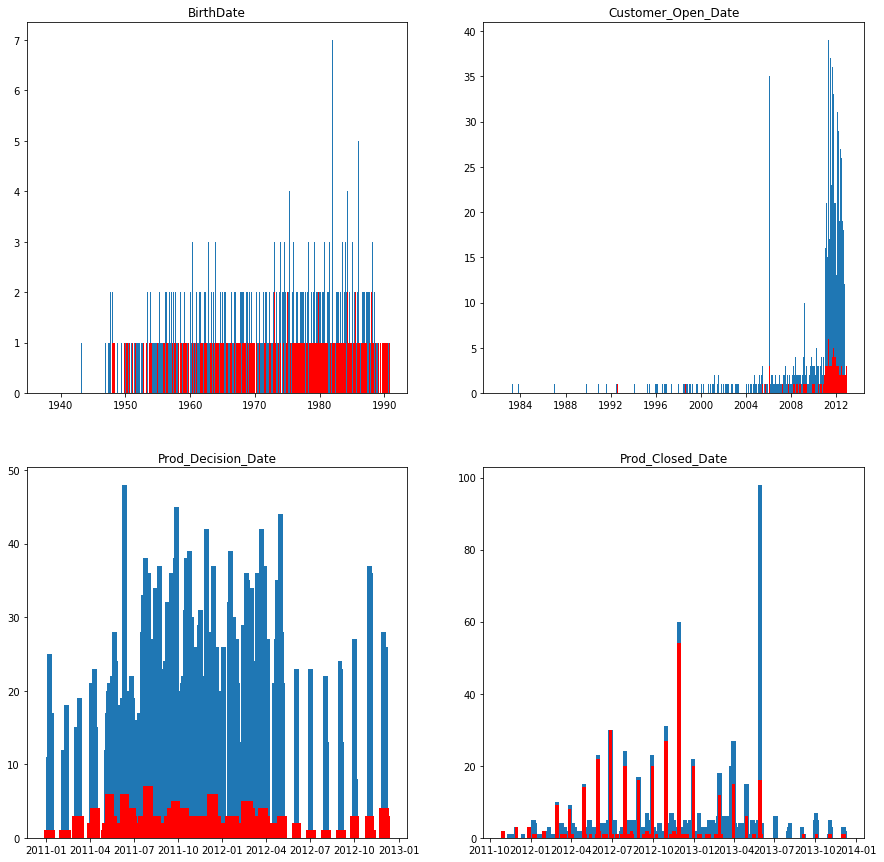

In [26]:
plt.subplots(figsize=(15,15))

for i, var in enumerate(date_variables):
    fig = plt.subplot(2,2,i+1)
    fig.set_title(var)
    hist_data = df[var].value_counts()
    plt.bar(height=hist_data.values, x = hist_data.keys(), width =10)
    hist_data = df.loc[df['Y'] == 1][var].value_counts()
    plt.bar(height=hist_data.values, x = hist_data.keys(), width = len(hist_data)/10, color='red')
    
plt.show()

One can observe that:
- the count of each variable does not always match the 5380 rows that are intended (because of the NaN), for instance, the Prod_Closed_Dates lacks information
- There are some extrapolated values in some numeric features (the net annual income of 10000, or the years at business of 98), that might be good to remove

### f. Complete and create suitable dataset for training and testing

First fill the NA fields

In [49]:
for var in ['Number_Of_Dependant', 'Net_Annual_Income', 'Years_At_Business']:
    df[var] = df[var].fillna(df[var].mean())

In [48]:
df['Prod_Closed_Date'] = df['Prod_Closed_Date'].fillna(np.datetime64('2014-01-01'))

Reject unrelevant data

In [34]:
df = df.loc[df['Number_Of_Dependant'] < 15].loc[df['Net_Annual_Income'] < 6000 ].loc[df['Years_At_Business']< 80]

Use catagorical features as a one hot vector

In [40]:
categorical_variables.remove('Y')
categorical_df = pd.get_dummies(df[categorical_variables])
categorical_df.head()

,Customer_Type_Existing Client,Customer_Type_Non Existing Client,P_Client_NP_Client,P_Client_P_Client,Educational_Level_Diploma,Educational_Level_Master/PhD,Educational_Level_Secondary or Less,Educational_Level_University,Marital_Status_Divorced,Marital_Status_Married,...,Prod_Category_D,Prod_Category_E,Prod_Category_F,Prod_Category_G,Prod_Category_H,Prod_Category_I,Prod_Category_J,Prod_Category_K,Prod_Category_L,Prod_Category_M
0,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


Dates need to be put into a numerical format. To do so, first remark that there is no periodicity (due to the months for instance). Only the information that comes from month and year will be kept

In [50]:
# takes a timestamp: DD/MM/YY and converts it to a scalar
def read_date(date):
    return date.month/12.0 + date.year

In [51]:
date_df = pd.DataFrame()
for var in date_variables:
    date_df[var] = df[var].apply(read_date)
    
date_df = date_df - date_df.mean()
date_df.head()

,BirthDate,Customer_Open_Date,Prod_Decision_Date,Prod_Closed_Date
0,5.298203,1.508907,0.244326,0.250342
1,2.214870,-1.324426,-0.422340,0.250342
2,1.298203,1.592240,0.410993,0.250342
3,10.381536,1.008907,-0.339007,-0.832991
4,-18.618464,2.175574,0.994326,0.250342


Then numerical data are taken as they are

In [53]:
numerical_df = df[numerical_variables]
numerical_df.head()

,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Nb_Of_Products
0,3.0,1,36.0,1.0,1
1,0.0,12,18.0,2.0,1
2,2.0,10,36.0,1.0,1
3,3.0,3,36.0,1.0,1
4,2.0,1,36.0,1.0,1


Create the final dataframe

,Y,Customer_Type_Existing Client,Customer_Type_Non Existing Client,P_Client_NP_Client,P_Client_P_Client,Educational_Level_Diploma,Educational_Level_Master/PhD,Educational_Level_Secondary or Less,Educational_Level_University,Marital_Status_Divorced,...,Prod_Category_M,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Nb_Of_Products,BirthDate,Customer_Open_Date,Prod_Decision_Date,Prod_Closed_Date
0,0,0,1,1,0,0,0,0,1,0,...,0,3.0,1,36.0,1.0,1,5.298203,1.508907,0.244326,0.250342
1,0,1,0,0,1,0,0,0,1,0,...,0,0.0,12,18.0,2.0,1,2.214870,-1.324426,-0.422340,0.250342
2,0,0,1,1,0,0,0,0,1,0,...,0,2.0,10,36.0,1.0,1,1.298203,1.592240,0.410993,0.250342
3,1,1,0,1,0,0,0,0,1,0,...,0,3.0,3,36.0,1.0,1,10.381536,1.008907,-0.339007,-0.832991
4,0,0,1,1,0,0,0,0,1,0,...,0,2.0,1,36.0,1.0,1,-18.618464,2.175574,0.994326,0.250342


In [86]:
new_df = pd.concat([df['Y'], categorical_df, numerical_df, date_df], axis=1)
new_df.head()
y = new_df.pop('Y').values.codes
X = new_df.values
print(y)
print(X)

[0 0 0 ... 0 0 0]
[[ 0.          1.          1.         ...  1.50890692  0.24432631
   0.25034198]
 [ 1.          0.          0.         ... -1.32442641 -0.42234036
   0.25034198]
 [ 0.          1.          1.         ...  1.59224025  0.41099297
   0.25034198]
 ...
 [ 0.          1.          1.         ...  1.00890692 -0.25567369
  -0.58299136]
 [ 0.          1.          1.         ...  1.42557359  0.16099297
   0.25034198]
 [ 0.          1.          1.         ...  1.17557359 -0.08900703
   0.25034198]]


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 2. Feature engineering

### a. Utils

### b. Scores

### c. Linear models

### d. Neural Networks

### e. Random Forest